In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# A. Thu thập dữ liệu

* Ngữ cảnh:
    * Indonesia là một quốc gia nhiệt đới với khí hậu đa dạng và phức tạp, ảnh hưởng lớn đến nông nghiệp, công nghiệp và đời sống của người dân. Phân tích dữ liệu khí hậu hàng ngày trong giai đoạn 2010-2020 sẽ cung cấp cái nhìn sâu sắc về các xu hướng thời tiết và khí hậu tại quốc gia này, từ đó giúp đưa ra những quyết định hợp lý trong nhiều lĩnh vực.

* Bộ dữ liệu:
    * Chủ đề: Dữ liệu khí hậu hàng ngày của Indonesia từ 2010 đến 2020.
    * Nguồn: https://www.kaggle.com/datasets/greegtitan/indonesia-climate/data

* License:
    * Bản quyền thuộc về tác giả gốc (BMKG (Cơ quan Khí tượng, Khí hậu và Địa vật lý Indonesia)), cho phép sao chép, chỉnh sửa và phân loại dữ liệu.

* Cách thức thu thập dữ liệu:
    * Nguồn thu thập: hoàn toàn phụ thuộc vào dữ liệu của BMKG (Cơ quan Khí tượng, Khí hậu và Địa vật lý Indonesia), theo đường dẫn: https://dataonline.bmkg.go.id/data_gempa_bumi


# B. Khám phá dữ liệu

In [2]:
df_climate = pd.read_csv('climate_data.csv')
df_province = pd.read_csv('province_detail.csv')
df_station = pd.read_csv('station_detail.csv')

- Mô tả các cột dữ liệu của climate_data:
    - **date**: Ngày tháng năm cụ thể.
    - **Tn**: Nhiệt độ tối thiểu trong ngày (°C).
    - **Tx**: Nhiệt độ tối đa trong ngày (°C).
    - **Tavg**: Nhiệt độ trung bình trong ngày (°C).
    - **RH_avg**: Độ ẩm trung bình trong ngày (%).
    - **RR**: Lượng mưa trong ngày (mm).
    - **ss**: Thời lượng nắng trong ngày (giờ).
    - **ff_x**: Tốc độ gió lớn nhất trong ngày (m/s).
    - **ddd_x**: Hướng gió tại tốc độ lớn nhất (°).
    - **ff_avg**: Tốc độ gió trung bình trong ngày (m/s).
    - **ddd_car**: Hướng gió chủ đạo trong ngày (°).
    - **station_id**: ID của trạm đo.

- Mô tả các cột dữ liệu của station_detail:
    - **station_id**: ID của trạm đo.
    - **station_name**: Tên của trạm đo.
    - **region_name**: Tên vùng mà trạm đo đặt tại.
    - **latitude**: Vĩ độ của trạm đo.
    - **longitude**: Kinh độ của trạm đo.
    - **region_id**: ID của vùng.
    - **province_id**: ID của tỉnh.

- Mô tả các cột dữ liệu của province_detail:
    - **province_id**: ID của tỉnh.
    - **province_name**: Tên của tỉnh.

- Từ việc phân tích các cột dữ liệu của các bảng trên, ta sẽ gộp các bảng dữ liệu với nhau:
    - Gộp `station_detail` với `province_detail` bằng `province_id`
    - Gộp `climate_data` với `station_detail` bằng `station_id`

In [3]:
# merge 3 csv
df_merg = df_station.merge(df_province, on=["province_id"], how='left')
df_merg_last = df_climate.merge(df_merg, on=["station_id"], how='left')
df = df_merg_last.copy()
df.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id,province_name
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam


In [4]:
print('Số hàng: ', df.shape[0])
print('Số cột: ', df.shape[1])

Số hàng:  589265
Số cột:  19


- Bộ dữ liệu có tổng cộng 589265 dòng, mỗi dòng đều có đúng 1 ý nghĩa, đó là thể hiện dữ liệu thời tiết liên quan đến 1 ngày xác định

- Bộ dữ liệu có 19 cột:
    - Mô tả các cột dữ liệu khí hậu:
        - **date**: Ngày tháng năm cụ thể.
        - **Tn**: Nhiệt độ tối thiểu trong ngày (°C).
        - **Tx**: Nhiệt độ tối đa trong ngày (°C).
        - **Tavg**: Nhiệt độ trung bình trong ngày (°C).
        - **RH_avg**: Độ ẩm trung bình trong ngày (%).
        - **RR**: Lượng mưa trong ngày (mm).
        - **ss**: Thời lượng nắng trong ngày (giờ).
        - **ff_x**: Tốc độ gió lớn nhất trong ngày (m/s).
        - **ddd_x**: Hướng gió tại tốc độ lớn nhất (°).
        - **ff_avg**: Tốc độ gió trung bình trong ngày (m/s).
        - **ddd_car**: Hướng gió chủ đạo trong ngày (°).

    - Mô tả các cột dữ liệu về trạm đo:
        - **station_id**: ID của trạm đo.
        - **station_name**: Tên của trạm đo.
        - **region_name**: Tên vùng mà trạm đo đặt tại.
        - **latitude**: Vĩ độ của trạm đo.
        - **longitude**: Kinh độ của trạm đo.
        - **region_id**: ID của vùng.

    - Mô tả các cột dữ liệu về tỉnh:
        - **province_id**: ID của tỉnh.
        - **province_name**: Tên của tỉnh.

- Sau đây ta sẽ đi xem qua kiểu dữ liệu của từng cột:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           589265 non-null  object 
 1   Tn             565882 non-null  float64
 2   Tx             551529 non-null  float64
 3   Tavg           544160 non-null  float64
 4   RH_avg         541083 non-null  float64
 5   RR             463881 non-null  float64
 6   ss             545544 non-null  float64
 7   ff_x           579051 non-null  float64
 8   ddd_x          576137 non-null  float64
 9   ff_avg         579138 non-null  float64
 10  ddd_car        575526 non-null  object 
 11  station_id     589265 non-null  int64  
 12  station_name   589265 non-null  object 
 13  region_name    589265 non-null  object 
 14  latitude       589265 non-null  float64
 15  longitude      589265 non-null  float64
 16  region_id      589265 non-null  int64  
 17  province_id    589265 non-nul

- Ta cần chuyển cột dữ liệu `date` có thuộc tính object thành datetime, dồng thời tách thêm cột `date` thành 3 cột `year`, `month`, `day`

In [6]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

- Sau khi đã chuyển xong, ta sẽ kiểm tra tỉ lệ thiếu giá trị của các cột

In [7]:
def missing_ratio(s):
    return (s.isnull().sum()/s.shape[0]).round(1)

df_missing_info = df.agg([missing_ratio])
df_missing_info

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,...,station_name,region_name,latitude,longitude,region_id,province_id,province_name,year,month,day
missing_ratio,0.0,0.0,0.1,0.1,0.1,0.2,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Ta thấy tỉ lệ thiếu giá trị của các cột khá nhỏ, nên ta có thể sử dụng nội suy (interpolation) để xử lý các giá trị thiếu này

In [8]:
df['Tx'] = df['Tx'].interpolate()
df['Tavg'] = df['Tavg'].interpolate()
df['RH_avg'] = df['RH_avg'].interpolate()
df['RR'] = df['RR'].interpolate()
df['ss'] = df['ss'].interpolate()

df_missing_info = df.agg([missing_ratio])
df_missing_info

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,...,station_name,region_name,latitude,longitude,region_id,province_id,province_name,year,month,day
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Sau khi đã kiểm tra xong việc thiếu dữ liệu, ta sẽ kiểm tra tiếp xem dữ liệu có ngoại lệ (outlier) hay không.

In [9]:
print(df.describe())

                                date             Tn             Tx  \
count                         589265  565882.000000  589265.000000   
mean   2015-08-09 23:46:38.410222592      23.312111      31.500447   
min              2010-01-01 00:00:00       0.000000       0.000000   
25%              2012-08-27 00:00:00      23.000000      30.500000   
50%              2015-10-23 00:00:00      24.000000      31.800000   
75%              2018-06-09 00:00:00      25.000000      32.900000   
max              2020-12-31 00:00:00     246.000000     334.000000   
std                              NaN       2.280687       2.405277   

                Tavg         RH_avg             RR             ss  \
count  589265.000000  589265.000000  589265.000000  589265.000000   
mean       26.821990      82.596287       8.640484       5.040292   
min         0.000000      24.000000      -1.000000       0.000000   
25%        26.200000      79.000000       0.000000       2.500000   
50%        27.127886    

- Ở đây sẽ sử dụng boxplot để trực quan dễ hơn

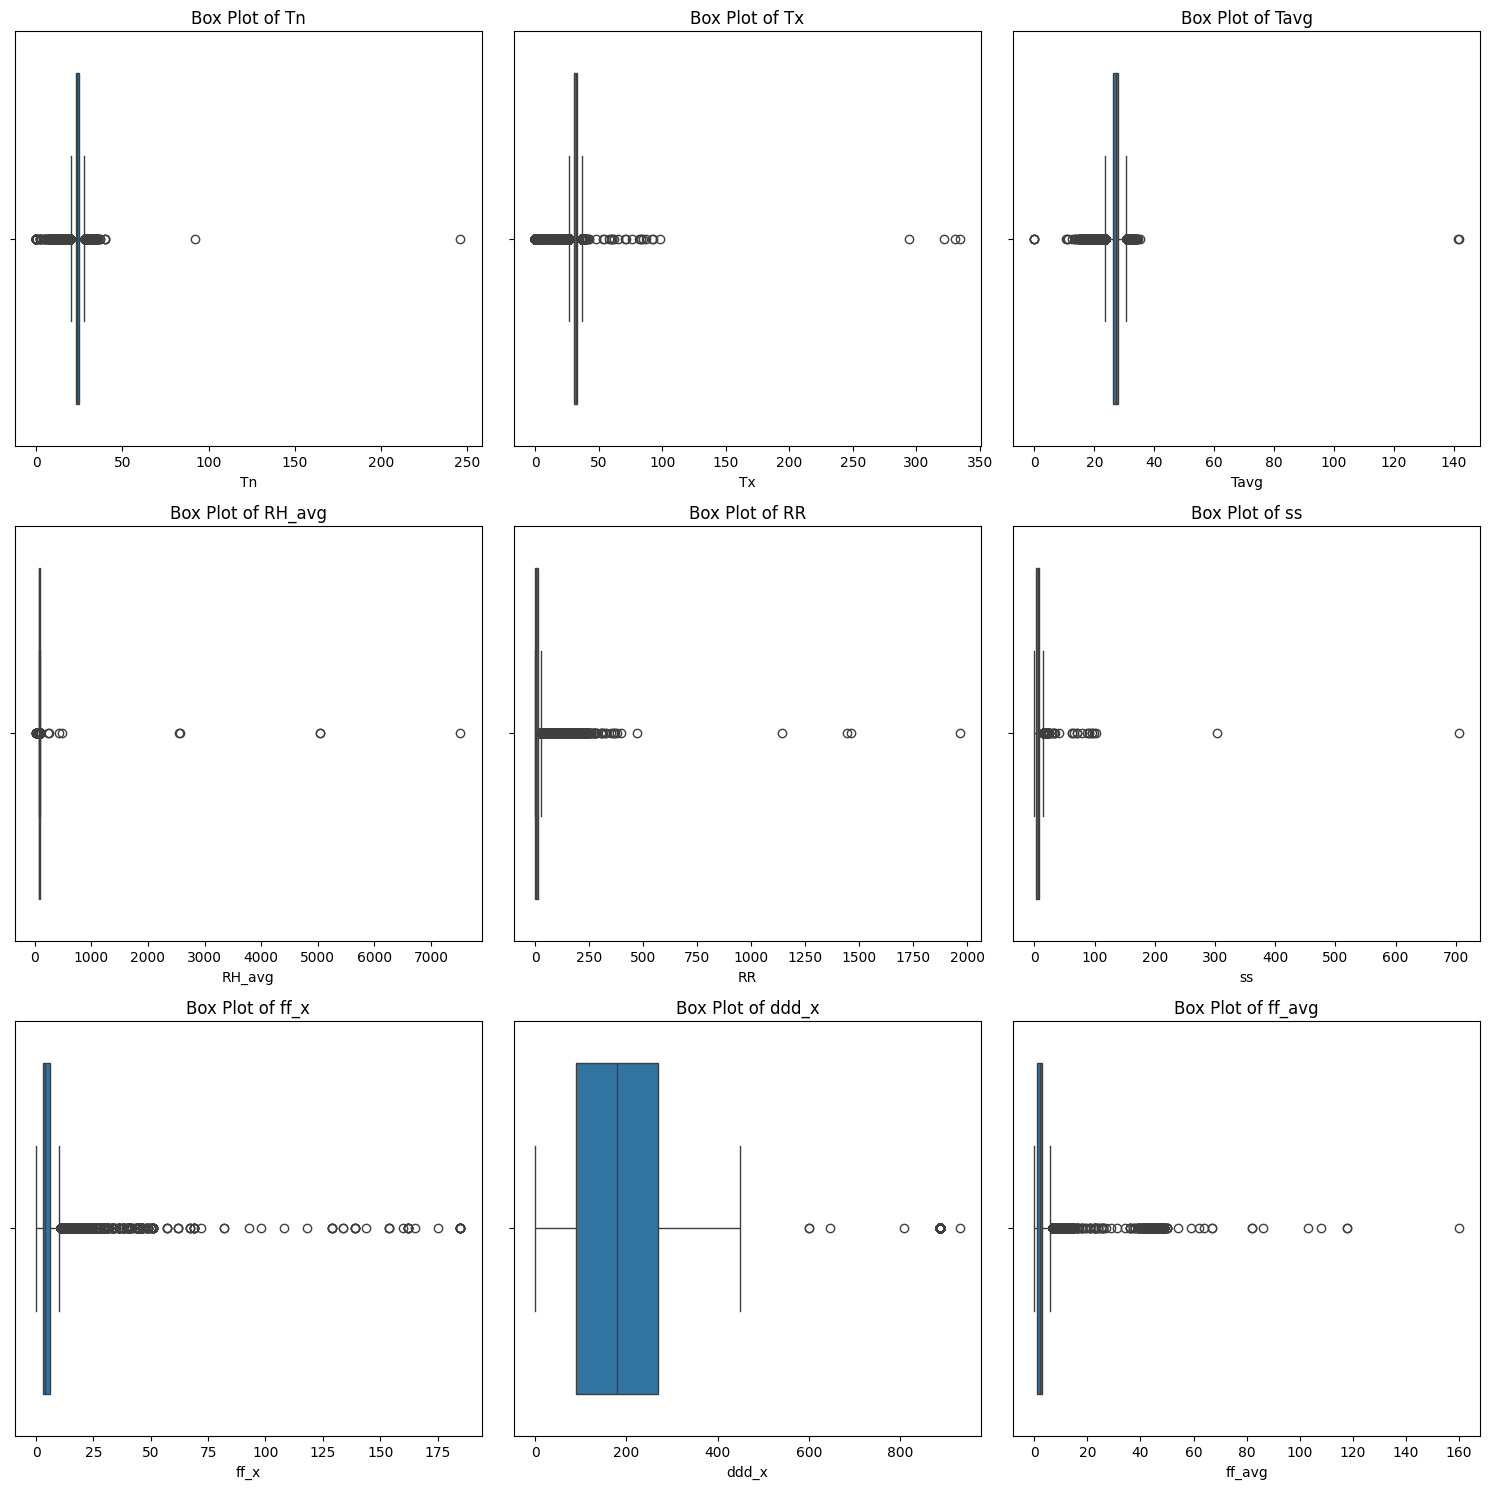

In [10]:
columns_to_plot = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

# Tạo các subplots
num_cols = len(columns_to_plot)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Vẽ box plot cho từng cột
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Ẩn các axes trống
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Đối với các cột dữ liệu nhiệt độ, ta sẽ chỉ giữ lại các hàng có dữ liệu trong khoảng 0 đến 50 độ C
- Đồng trời bỏ các hàng có dữ liệu lỗi như nhiệt độ tối thiểu trong ngày (Tn) lớn hơn nhiệt độ tối đa trong ngày (Tx)

In [11]:
df = df[(df['Tn'] < 50) & (df['Tn'] > 0)]
df = df[(df['Tx'] < 50) & (df['Tx'] > 0)]
df = df[(df['Tavg'] < 50) & (df['Tavg'] > 0)]
df = df[(df['Tn'] <= df['Tx'])]

- Đối với cột có giá trị phần trăm như cột RH_avg, ta sẽ loại bỏ các giá trị vượt quá 100%
- Đối với cột RR, ta sẽ bỏ các giá trị ngoại lệ lớn hơn 1000
- Đối với cột ss (có đơn vị là giờ), ta sẽ bỏ các giá trị vượt quá 24 giờ trong 1 ngày
- Đối với cột ddd_x (có đơn vị là độ), ta sẽ chỉ xét từ 0 đến 360 độ, cho nên cũng bỏ các giá trị vượt quá phạm vi này

In [12]:
df = df[(df['RH_avg'] <= 100)]
df = df[(df['RR'] <= 1000)]
df = df[(df['ss'] <= 24)]
df = df[(df['ddd_x'] <= 360)]

In [1]:
columns_to_plot = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

# Tạo các subplots
num_cols = len(columns_to_plot)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Vẽ box plot cho từng cột
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Ẩn các axes trống
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

- Ta xem xét cột ss và loại bỏ những hàng có giá trị vượt quá 15 (vì nhận thấy các giá trị này khá vô lý)
- Cuối cùng ta sẽ xem xét và bỏ những giá trị vượt quá 75 (m/s) của tốc độ gió, cụ thể trên cột ff_x và cột ff_avg

In [14]:
df = df[(df['ss'] <= 15)]
df = df[(df['ff_x'] <= 75)]
df = df[(df['ff_avg'] <= 75)]

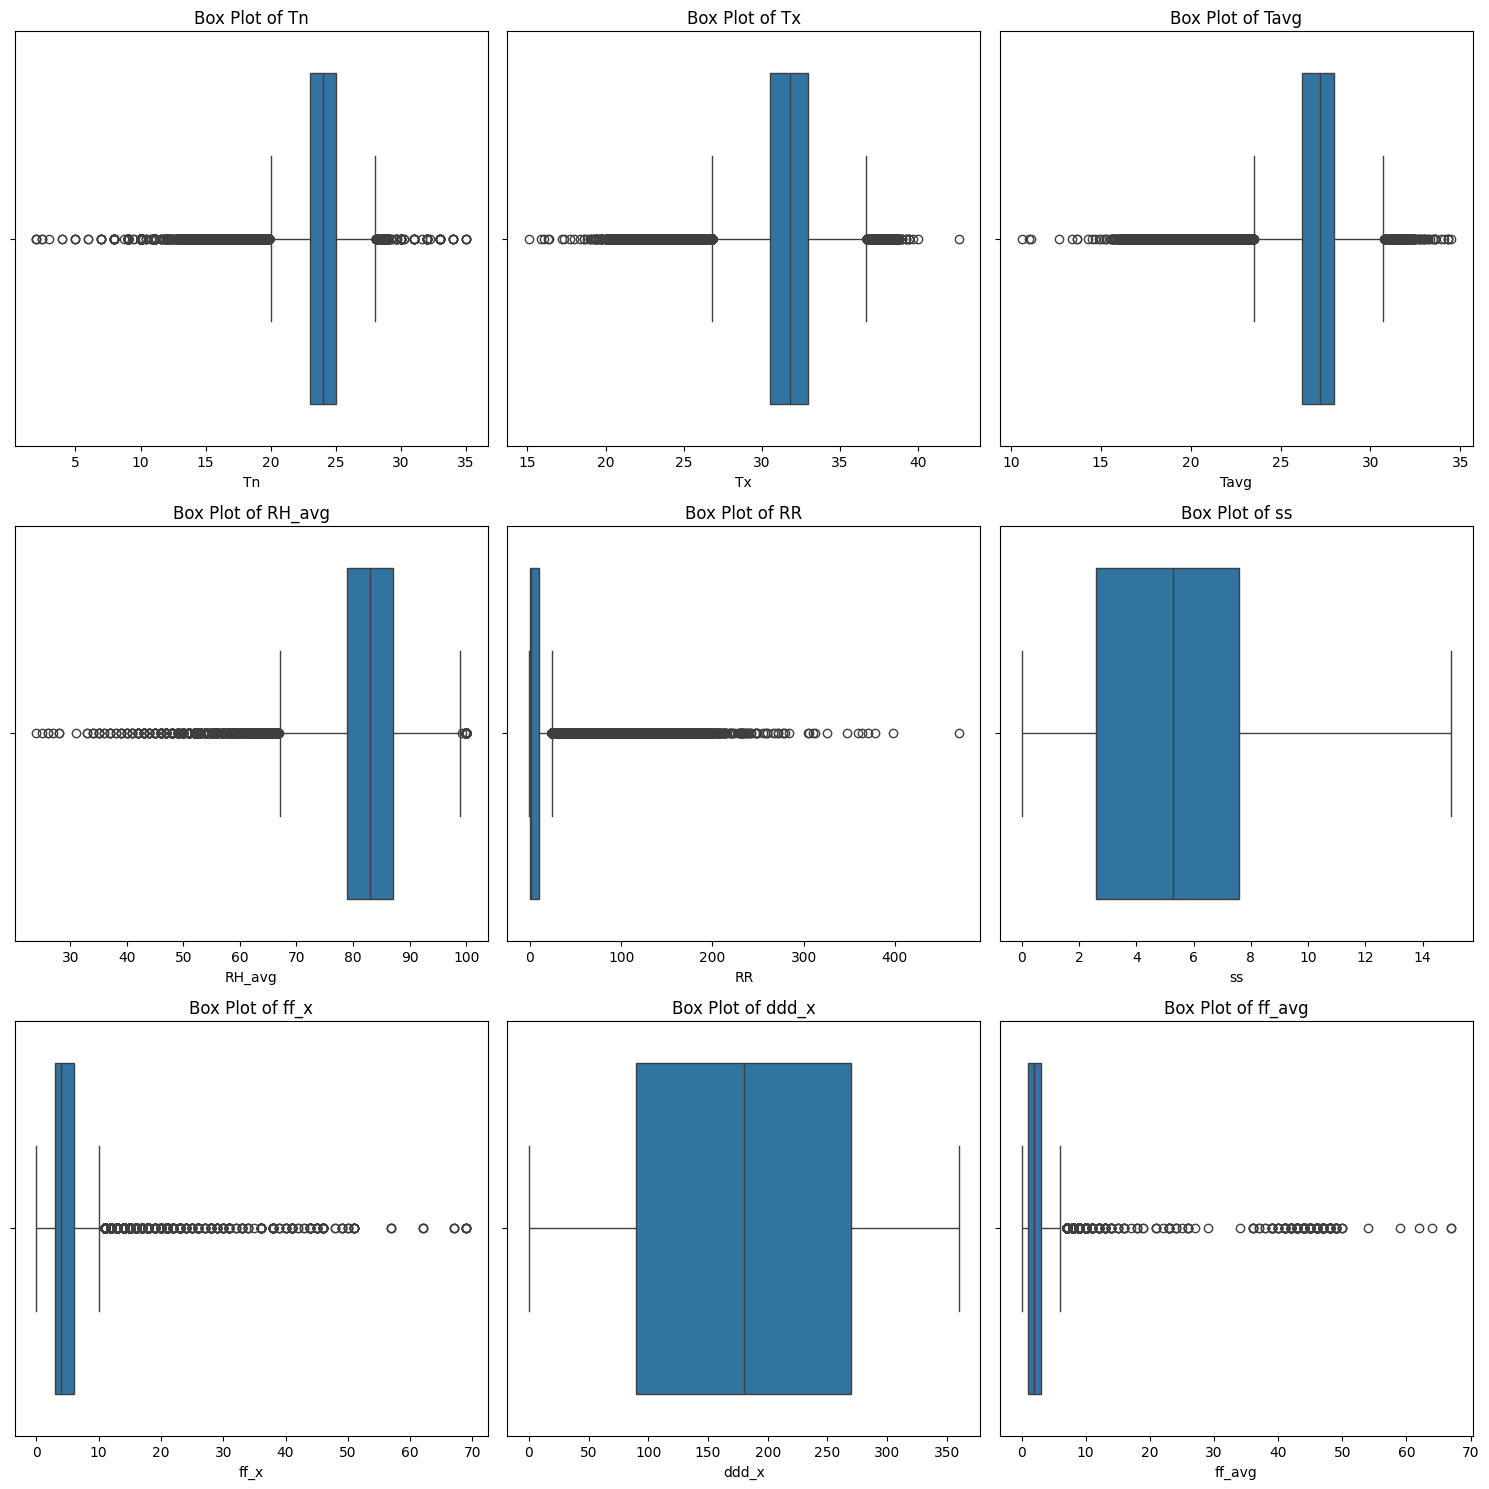

In [15]:
columns_to_plot = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

# Tạo các subplots
num_cols = len(columns_to_plot)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Vẽ box plot cho từng cột
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Ẩn các axes trống
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
df.shape

(548576, 22)

In [17]:
df.to_csv('climate.csv', index=False)